# [이론2] CNN 없이 이미지 분류하기

---

## 학습 목표
- 대표적인 이미지 데이터 예제인 Fashion MNIST 데이터를 이해합니다.
- CNN을 사용하지 않고 Fashion MNIST 분류 모델을 만듭니다.


---

## 목차
#### 1. Fashion MNIST 데이터 EDA

#### 2. CNN 없이 수행하는 이미지 분류 알고리즘

---

## 1. Fashion MNIST 데이터 EDA

이전 강의에서 이미지에 대한 기본적인 개념들을 배웠으니, 본격적으로 실제 예제 데이터를 가지고 이미지를 분류하는 모델을 만들어 봅시다.

오늘 다루게 될 이미지 데이터는 **Fashion MNIST**라는 유명한 데이터입니다.

<center><img src="./img/fashion_mnist.png" alt="fashion_mnist" align="center" border="0" width="600" height=auto></center>

**Fashion MNIST** 데이터 셋은 우리가 잘 알고 있는 숫자 손글씨 이미지 데이터 셋인 MNIST와 유사한 형태를 지녔는데요.

이름에서 알 수 있는 것처럼 패션 의류 제품 이미지를 10개의 항목으로 분류해 놓았습니다.
MNIST 데이터셋 이 신경망을 배울 때 사용하는 대표적인 예제로 과다하게 많이 사용되다 보니

보다 다양한 형태의 학습에 사용하기 위해서 유럽의 전자 상거래 회사인 [Zalando](https://www.zalando.com/)의 연구소에서 제공한 이미지 데이터 셋입니다. 

Zalando Research의 Github Repo에 있는 데이터를 참고하시면 좋을 것 같습니다 (https://github.com/zalandoresearch/fashion-mnist)

Fashion-MNIST는 총 70,000개의 이미지로 60,000개의 training data 세트와 10,000 개의 test data 세트로 구성되어 있습니다. 

각 이미지는 width와 height가 28 $\times$ 28개의 픽셀로 이루어진 낮은 해상도의 회색조 이미지입니다.

각 픽셀은 0(검은색)부터 255(흰색) 사이의 값을 가집니다.

(MNIST 데이터 셋을 기억하시는 분들이라면 MNIST와 동일한 이미지 수, 동일한 해상도라는 것을 눈치채셨을 수도 있겠네요!)

10개의 제품 분류는 다음과 같습니다.

**레이블 설명**

* 0 티셔츠/탑
* 1 바지
* 2 풀오버(스웨터의 일종)
* 3 드레스
* 4 코트
* 5 샌들
* 6 셔츠
* 7 스니커즈
* 8 가방
* 9 앵클 부츠

곧바로 실습을 통해 배워보도록 하겠습니다.

In [1]:
# tensorflow와 tf.keras 라이브러리를 불러옵니다
import tensorflow as tf
from tensorflow import keras

그리고 이미지가 배열이라는 것을 지난 시간에 다뤘었죠? Numpy 라이브러리와 그래프를 그리기 위한 matplotlib 라이브러리를 불러옵니다.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

이제 Fashion MNIST 데이터셋을 불러올 차례입니다. 이 데이터셋은 keras에서 이미 제공되는 데이터이므로 쉽게 불러들일 수 있습니다.

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_X, train_y), (test_X, test_y) = fashion_mnist.load_data() # training dataset과 test dataset을 분리합니다.

4431872/4422102 [==============================] - 0s 0us/step


데이터 사이즈를 확인해볼까요? training set 6만 개, test set 1만 개로 이루어져 있습니다.

In [4]:
print(train_X.shape)
print(test_X.shape)

(60000, 28, 28)
(10000, 28, 28)


In [5]:
train_X[0].shape #예시로 첫 번째 이미지의 사이즈를 확인해봅니다. 28x28입니다.

(28, 28)

In [6]:
type(train_X[0]) #데이터의 유형은 array(배열)로 이루어져있음을 알 수 있습니다.

numpy.ndarray

각 카테고리의 라벨에 해당하는 train_y를 확인해보겠습니다

In [7]:
set(train_y) # 0부터 9까지 10개의 클래스가 있습니다.

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [8]:
# 클래스의 순서대로 해당되는 의류 카테고리의 이름입니다.
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

첫 번째 이미지가 어떤 형태인지 이미지를 출력해 보겠습니다. matplotlib 라이브러리의 `imshow` 함수를 사용합니다.

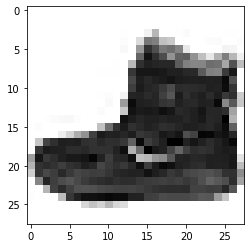

In [9]:
plt.imshow(train_X[0], cmap=plt.cm.binary)  #이미지가 회색조이기 때문에 cmap=plt.cm.binary 옵션을 포함시켜줍니다.

좌측 상단을 (0,0) 원점으로 하여 28x28 회색조 이미지가 잘 출력되었습니다. 신발 종류인 것처럼 보이네요!

이번에는 `colorbar` 함수를 통해 다른 방식으로 이미지를 출력해보겠습니다. 원래의 이미지에서 해당 픽셀의 색상이 검은색에 가까울수록 밝게 나타나고,

흰색에 가까울수록 어둡게 표현됩니다.

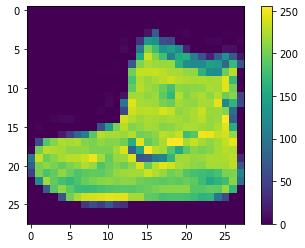

In [10]:
plt.figure() 
plt.imshow(train_X[0]) 
plt.colorbar() 
plt.grid(False) 
plt.show()

28x28=784개의 픽셀에 대해서 색상값을 어떻게 갖는지 분포를 살펴볼까요?

(array([0.04739396, 0.00062525, 0.00037515, 0.00037515, 0.0005002 ,
        0.00087535, 0.0010004 , 0.00112545, 0.0002501 , 0.00062525,
        0.00062525, 0.0007503 , 0.0007503 , 0.00037515, 0.0005002 ,
        0.0010004 , 0.00162565, 0.00262605, 0.0037515 , 0.0037515 ,
        0.0085034 , 0.0117547 , 0.00487695, 0.00237595, 0.00162565]),
 array([  0. ,  10.2,  20.4,  30.6,  40.8,  51. ,  61.2,  71.4,  81.6,
         91.8, 102. , 112.2, 122.4, 132.6, 142.8, 153. , 163.2, 173.4,
        183.6, 193.8, 204. , 214.2, 224.4, 234.6, 244.8, 255. ]),
 <BarContainer object of 25 artists>)

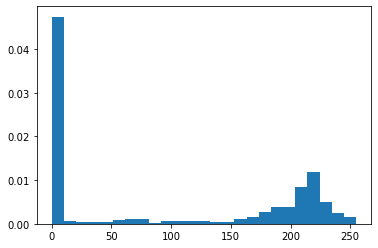

In [11]:
color_value = []
for i in range(train_X[0].shape[0]):
    for j in range(train_X[0].shape[1]):
        color_value.append(train_X[0][i][j])

plt.hist(color_value, bins=25, density=True)

배경이 되는 흰색 영역에 대해 0값을 가지고 물체에 해당하는 어두운 영역은 255에 가까운 값을 가집니다.

전체 이미지 데이터 셋이 어떤 그림으로 구성되어있는지 출력해서 확인해보도록 합시다.

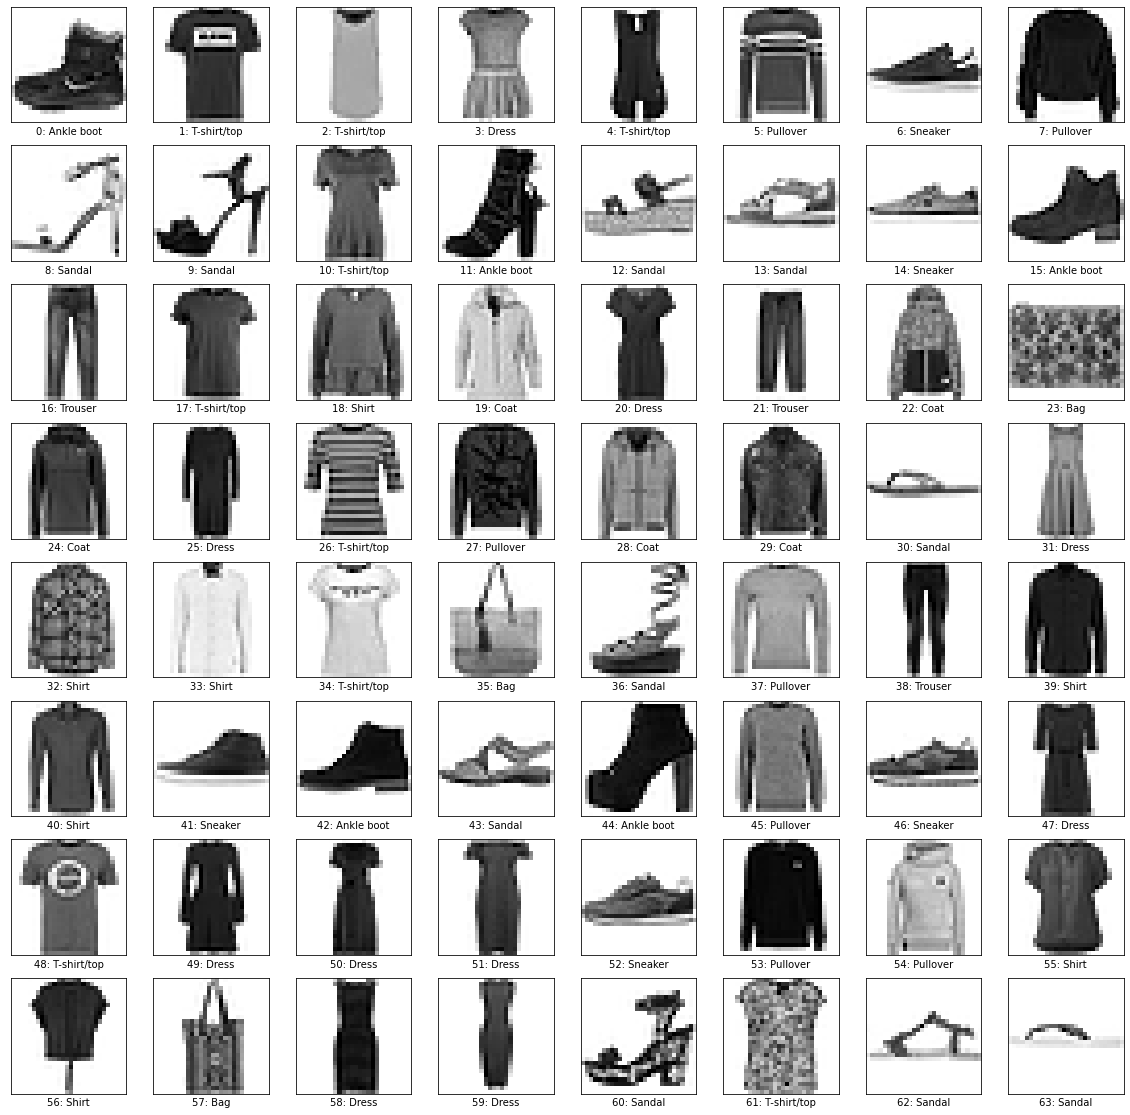

In [12]:
# 예시로 64개의 이미지를 8x8 형태로 출력해봅니다.

plt.figure(figsize=(20,20)) 
for i in range(64):
    plt.subplot(8,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.imshow(train_X[i], cmap=plt.cm.binary) #camp = plt.cm.binary 옵션으로 이미지를 회색으로 출력합니다.
    plt.xlabel(str(i)+': '+class_names[train_y[i]]) # 각 의류이미지가 어느 카테고리에 해당되는지 라벨링하여 출력합니다.
plt.show()

---

## 2. CNN 없이 수행하는 이미지 분류 알고리즘

MNIST와 Fashion MNIST는 신경망 튜토리얼에서 분류 작업을 염두에 두고 구성된 데이터셋입니다.

따라서 분류 작업에 주로 사용되는 머신러닝 모델을 본 데이터셋에도 적용해볼 수 있습니다.

일반적으로 이미지 데이터를 사용할 때는 이미지 처리에 강점을 보이는 모델인 합성곱 신경망(Convolutional Neural Network, CNN)을 사용한다고 하였지만,

이번 강의에서는 CNN을 사용하지 않고 간단한 인공 신경망인 다층 퍼셉트론(Multi-Layer Perceptron, MLP)를 사용하여 분류 작업을 수행하도록 하겠습니다.

이를 통해 과연 CNN을 사용하지 않는 경우에도 이미지가 잘 분류될지를 확인해보도록 하겠습니다.

우선 0부터 255까지의 값을 갖는 입력 데이터에 대해 0~1 사이의 값으로 normailzation 하겠습니다.

In [13]:
print(np.min(train_X[0]))
print(np.max(train_X[0]))

train_X = train_X / 255.0 
test_X = test_X / 255.0

0
255


다음과 같이 모델을 만들어줍니다. 모델은 자신이 원하는 형태에 따라 자유롭게 설계하셔도 됩니다.

아래의 모델은 3개의 hidden layer로 구성되었으며, 활성화함수로 ReLU를 사용하였습니다.

더불어 과적합(Overfitting) 방지를 위해 정규화(Regularization) 기법 중 하나인 Dropout을 추가하였습니다.

In [14]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), #input data의 이미지가 2차원이므로 Dense layer에 적용할 수 있도록 1차원으로 펴줍니다(Flatten).
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax') # 마지막 출력층의 클래스 개수는 10개로 지정해야 합니다.
])

모델을 학습시키도록 하겠습니다. 아래의 예시에서는 optimizer로는 adam을 사용하고 batch size는 64, epoch은 20번으로 지정하였습니다.

In [15]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
hist = model.fit(train_X, train_y, validation_data=(test_X, test_y), batch_size=64, epochs = 20) 

Epoch 1/20
938/938 [==============================] - 5s 5ms/step - loss: 0.5665 - accuracy: 0.7961 - val_loss: 0.4715 - val_accuracy: 0.8189
Epoch 2/20
938/938 [==============================] - 5s 5ms/step - loss: 0.4207 - accuracy: 0.8466 - val_loss: 0.3933 - val_accuracy: 0.8563
Epoch 3/20
938/938 [==============================] - 5s 5ms/step - loss: 0.3818 - accuracy: 0.8608 - val_loss: 0.3795 - val_accuracy: 0.8626
Epoch 4/20
938/938 [==============================] - 5s 6ms/step - loss: 0.3622 - accuracy: 0.8688 - val_loss: 0.3568 - val_accuracy: 0.8696
Epoch 5/20
938/938 [==============================] - 5s 6ms/step - loss: 0.3472 - accuracy: 0.8726 - val_loss: 0.3483 - val_accuracy: 0.8745
Epoch 6/20
938/938 [==============================] - 5s 6ms/step - loss: 0.3358 - accuracy: 0.8770 - val_loss: 0.3366 - val_accuracy: 0.8783
Epoch 7/20
938/938 [==============================] - 5s 6ms/step - loss: 0.3197 - accuracy: 0.8809 - val_loss: 0.3478 - val_accuracy: 0.8748
Epoch 

모델의 학습이 완료되고 test dataset에 대한 정확도를 확인해봅니다. 88% 수준의 비교적 높은 값이 나왔네요.

CNN을 사용하지 않고 MLP만으로도 분류가 꽤 잘 이루어짐을 알 수 있습니다.

In [17]:
test_loss, test_acc = model.evaluate(test_X, test_y) 
print('Test accuracy: {:.3f}%'.format(test_acc * 100))

313/313 [==============================] - 0s 1ms/step - loss: 0.3170 - accuracy: 0.8874
test accuracy: 88.740%


test dataset에 대해 학습된 모델을 통해 `predict` 함수로 예측을 실행하고 결과 loss 값과 정확도를 저장합니다.

In [18]:
predictions = model.predict(test_X)

test dataset의 첫 번째 이미지를 예시로 확인해보겠습니다. 여러분들 눈에는 어떤 제품처럼 보이나요?

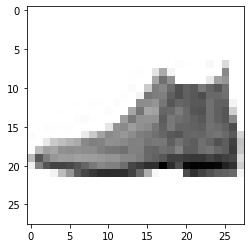

In [19]:
plt.imshow(test_X[0], plt.cm.binary)

test 데이터셋의 첫 번째 이미지가 어떤식으로 분류되는지 출력해봅시다.

In [20]:
print(np.max(predictions[0])) 
print([round(p, 4) for p in predictions[0]])
print(class_names[np.argmax(predictions[0])])

0.9936109
[0.0, 0.0, 0.0, 0.0, 0.0, 1e-04, 0.0, 0.0063, 0.0, 0.9936]
Ankle boot


가장 마지막 class에 해당하는 확률값이 99% 이상으로 최대값을 갖네요! Ankle boot로 분류되었습니다.

우리가 학습시킨 모델이 데이터셋의 이미지를 얼마나 잘 분류하는지 시각적으로 표현해보도록 하겠습니다.

In [21]:
def plot_image(i, predict_arr, true_label, img): 
    predict_arr, true_label, img = predict_arr[i], true_label[i], img[i] 
    plt.grid(False) 
    plt.xticks([]) 
    plt.yticks([]) 
    plt.imshow(img, cmap = plt.cm.binary) 

    # 실제 라벨과 예측한 라벨이 동일한 경우 파란색으로, 그렇지 않은 경우 빨간색으로 표시하도록 합니다.
    predicted_label = np.argmax(predict_arr) 
    if predicted_label == true_label: 
        color = 'blue' 
    else:
        color = 'red' 
    plt.xlabel(str(i)+": {} {:2.0f}% ({})".format(class_names[predicted_label], 100*np.max(predict_arr), class_names[true_label]), color=color, fontsize=7)

In [22]:
def plot_value_array(i, predict_arr, true_label): 
    predict_arr, true_label = predict_arr[i], true_label[i] 
    plt.grid(False)
    plt.xticks(list(set(train_y)))
    plt.yticks([0, 0.5, 1], fontsize=6) 
    plt.ylim([0,1]) 
    thisplot = plt.bar(range(10), predict_arr, color = "#777777" ) 
    predicted_label = np.argmax(predict_arr) 
    thisplot[predicted_label].set_color('red') 
    thisplot[true_label].set_color('blue')

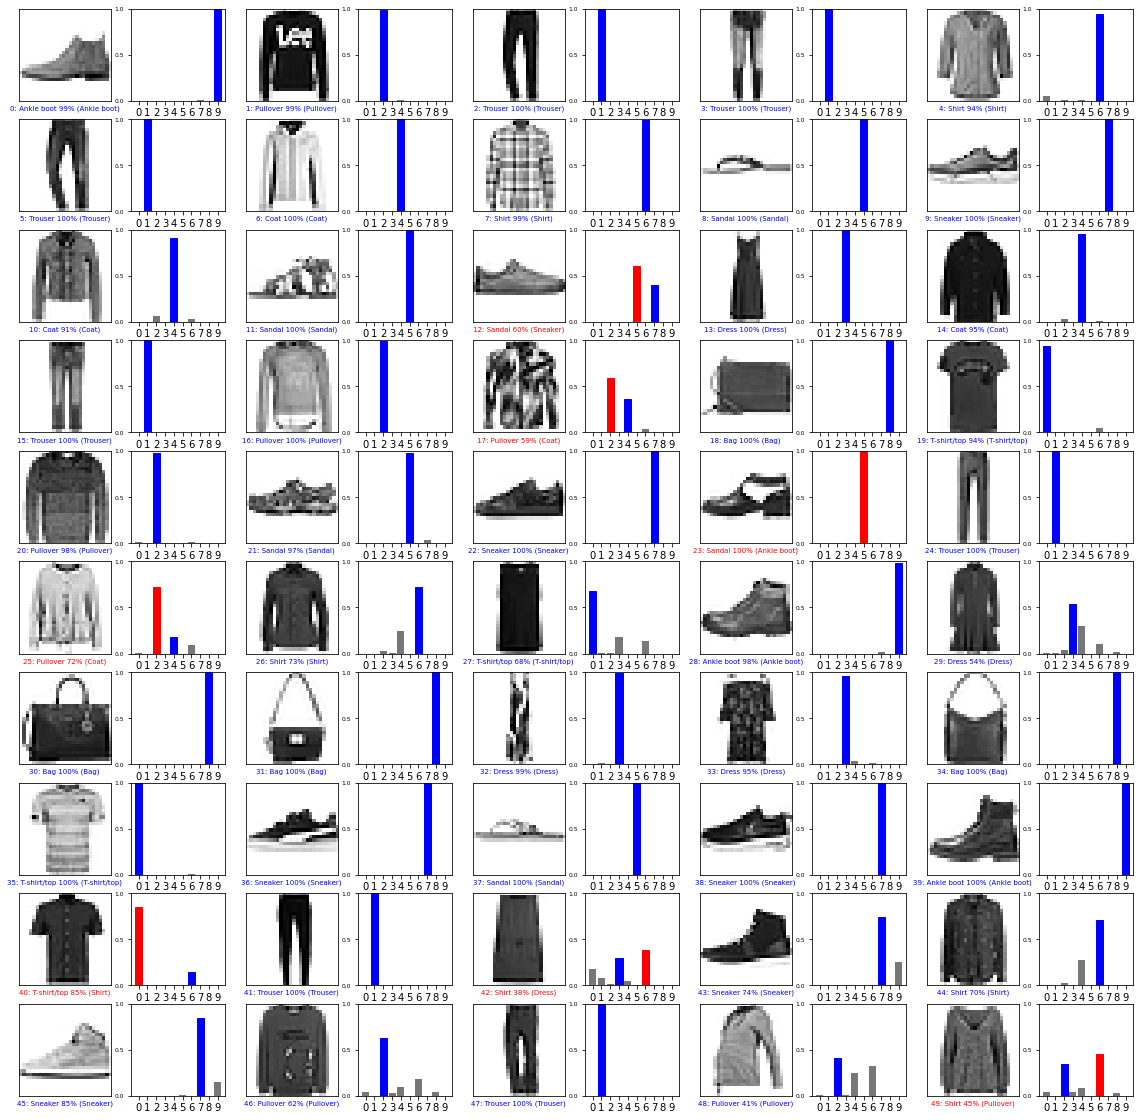

In [23]:
num_rows = 10
num_cols = 5
num_images = num_rows * num_cols 

plt.figure(figsize = (2*2*num_cols, 2*num_rows)) 
for i in range(num_images): 
    plt.subplot(num_rows, 2*num_cols, 2*i+1) 
    plot_image(i, predictions, test_y, test_X) 
    plt.subplot(num_rows, 2*num_cols, 2*i+2) 
    plot_value_array(i, predictions, test_y) 
plt.show()

아까 확인했었던 1번째 이미지를 다시 살펴볼까요?

[6.2269869e-08 3.4569720e-07 5.3117843e-09 8.2536388e-07 1.1923611e-10
 1.1385689e-04 6.3342558e-09 6.2739295e-03 2.1768784e-08 9.9361092e-01]


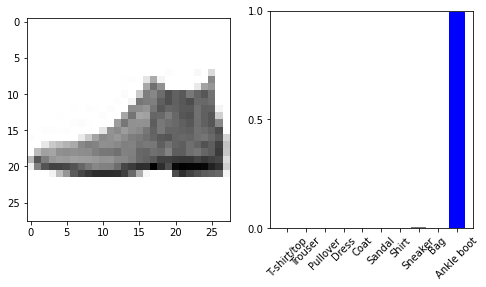

The predicted class is Ankle boot with probability of 0.9936109


In [24]:
img = (np.expand_dims(test_X[0], 0))
pred = model.predict(img)
print(pred[0])

plt.figure(figsize = (8,4))
plt.subplot(1, 2, 1) 
plt.imshow(test_X[0], cmap=plt.cm.binary)

plt.subplot(1, 2, 2) 
plot_value_array(0, pred, [test_y[0]])
plt.xticks(range(10), class_names, rotation = 45)
plt.yticks([0, 0.5, 1], fontsize=10)
plt.ylim([0,1]) 

plt.show()
print("The predicted class is", class_names[np.argmax(pred[0])], "with probability of", np.max(pred[0]))

0.99 수준의 높은 확률로 왼쪽의 이미지를 Ankle boot로 올바르게 예측하였습니다. 

주목해볼만한 것은 0에 가까운 매우 작은 수이지만 Sneaker로 분류될 확률도 약간 보이는 것 같네요. 

같은 신발 계열의 특징을 가지고 있어서 그런 것으로 보입니다.

마지막으로 학습이 진행됨에 따라 각 epoch별로 loss과 accuracy가 어떻게 변화하는지 그래프로 표현해보겠습니다.

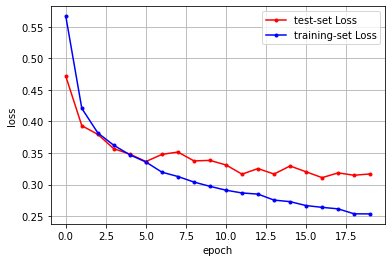

In [25]:
y_vacc = hist.history['val_accuracy']
y_acc = hist.history['accuracy']

y_vloss = hist.history['val_loss']
y_loss = hist.history['loss']

x_len = np.arange(len(y_loss))
plt.xticks = list(x_len)
plt.plot(x_len, y_vloss, marker='.', c='red', label="test-set Loss") # test set에 대한 loss를 주어진 x 좌표값들에 대해 꺾은선 그래프로 표현합니다.
plt.plot(x_len, y_loss, marker='.', c='blue', label="training-set Loss") # training set에 대한 loss를 주어진 x 좌표값들에 대해 꺾은선 그래프로 표현합니다.

plt.legend(loc='upper right')
plt.grid()

plt.xlabel('epoch')
plt.ylabel('loss')

plt.show()

위의 그래프에서 학습이 진행됨에 따라 epoch에 따른 loss의 변화를 살펴봤다면 다음은 accuracy의 변화를 살펴보도록 하겠습니다.

Text(0, 0.5, 'acc')

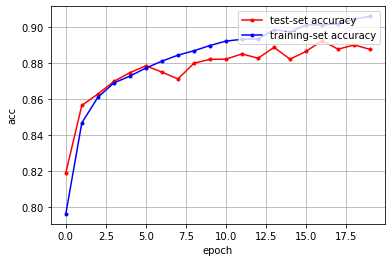

In [26]:
plt.plot(x_len, y_vacc, marker='.', c='red', label="test-set accuracy")
plt.plot(x_len, y_acc, marker='.', c='blue', label="training-set accuracy")

plt.legend(loc='upper right')
plt.grid()

plt.xlabel('epoch')
plt.ylabel('acc')


위와 같이 Fashion MNIST와 같은 비교적 간단한 형태의 이미지 데이터는 CNN이 없이도 꽤 우수한 성능을 가진 분류모델을 만들 수 있음을 확인할 수 있었습니다.

다음 강의에서는 CNN에 대해 구체적으로 다뤄보도록 하겠습니다!

---

<span style="color:rgb(120, 120, 120)">본 학습 자료를 포함한 사이트 내 모든 자료의 저작권은 엘리스에 있으며 외부로의 무단 복제, 배포 및 전송을 불허합니다.

Copyright @ elice all rights reserved</span>